<a href="https://colab.research.google.com/github/luis-gustav0/Repository_A/blob/main/IA_aumentada_prevendo_atrasos_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

### Entendendo o conjunto de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('flights.csv')

In [ ]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
dados.shape

(71175, 11)

In [ ]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

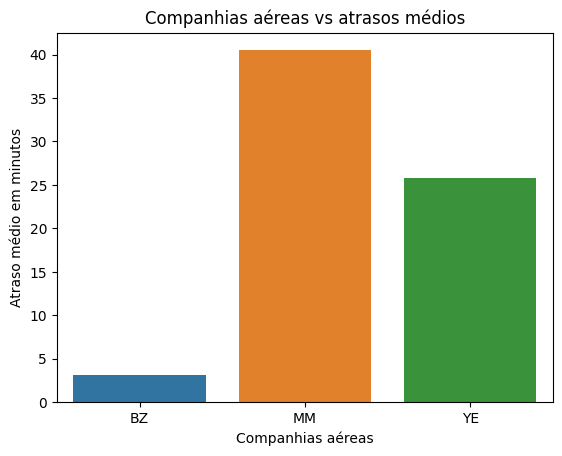

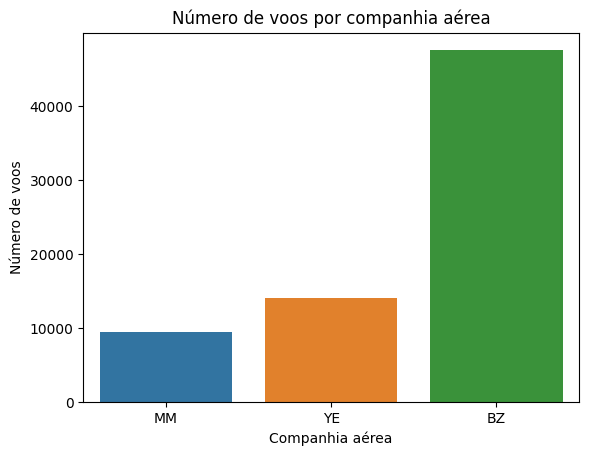

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay, hue='airline')
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline',hue='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

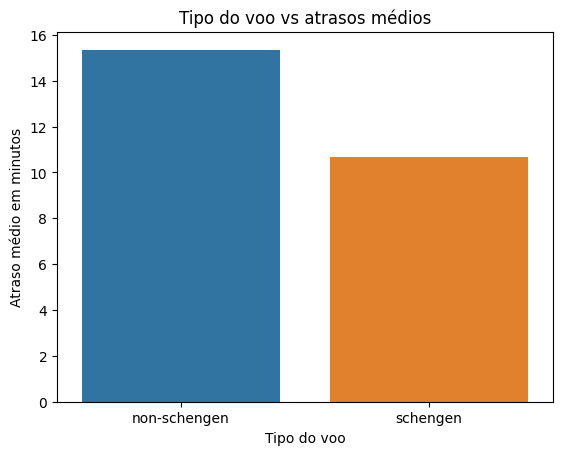

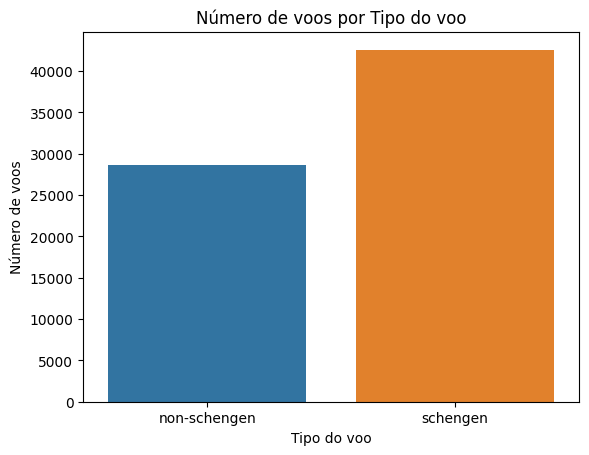

In [ ]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay, hue='schengen')
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen',hue='schengen')
plt.title('Número de voos por Tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

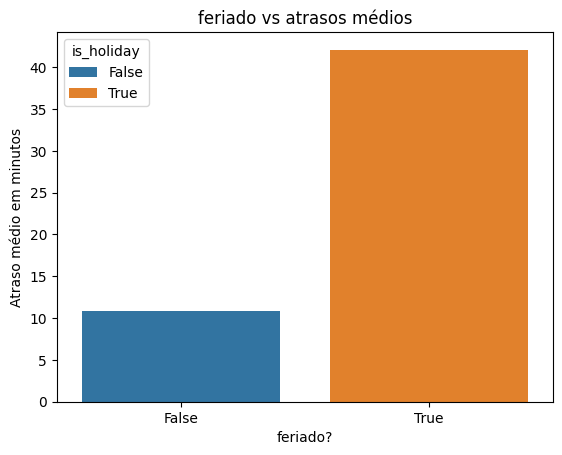

In [ ]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay, hue='is_holiday')
plt.title('feriado vs atrasos médios')
plt.xlabel('feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

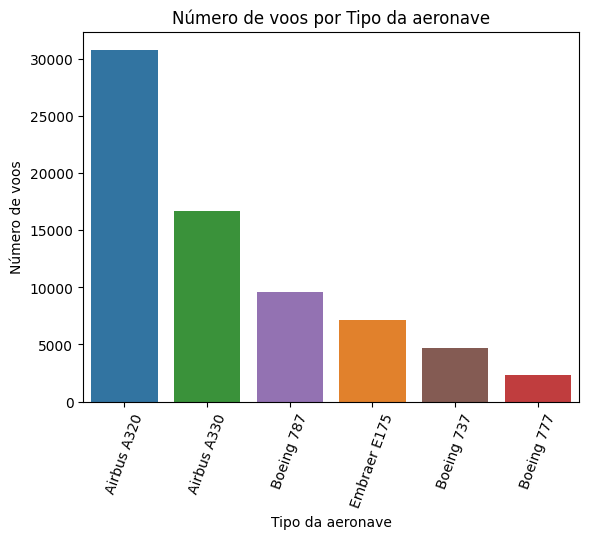

In [ ]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type',hue='aircraft_type', order=order)
plt.title('Número de voos por Tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

# Analisando a distribuição dos dados

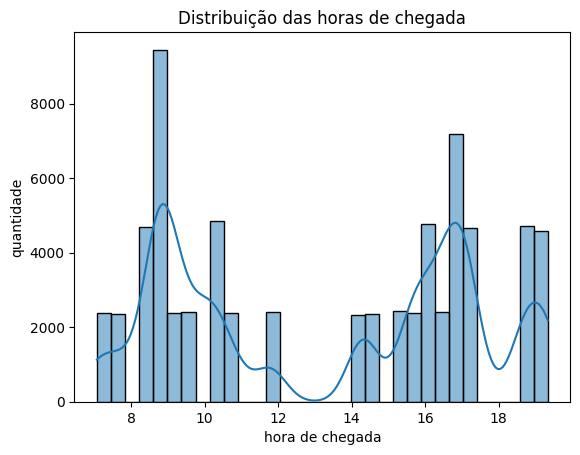

In [ ]:
sns.histplot(data=dados, x='arrival_time', kde=True)
plt.title('Distribuição das horas de chegada')
plt.xlabel('hora de chegada')
plt.ylabel('quantidade')
plt.show()

In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

In [ ]:
largura_bin_at = calcular_largura_bin(dados,'arrival_time')

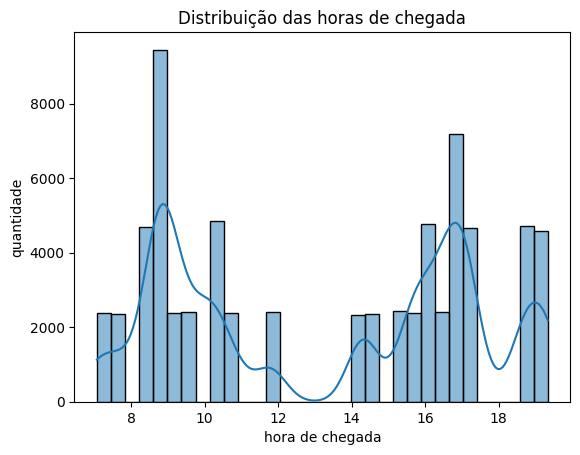

In [ ]:
sns.histplot(data=dados, x='arrival_time', kde=True)
plt.title('Distribuição das horas de chegada')
plt.xlabel('hora de chegada')
plt.ylabel('quantidade')
plt.show()

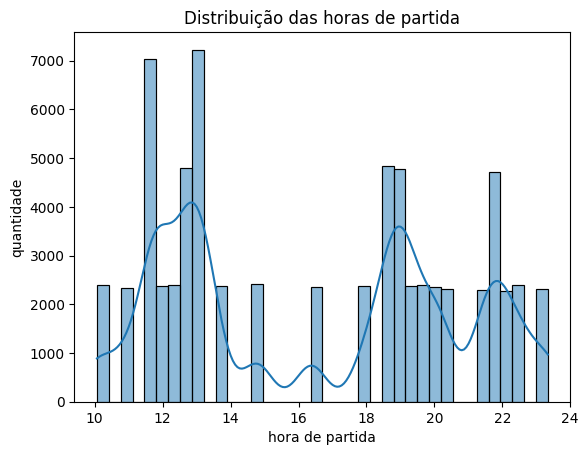

In [ ]:
sns.histplot(data=dados, x='departure_time', kde=True)
plt.title('Distribuição das horas de partida')
plt.xlabel('hora de partida')
plt.ylabel('quantidade')
plt.show()

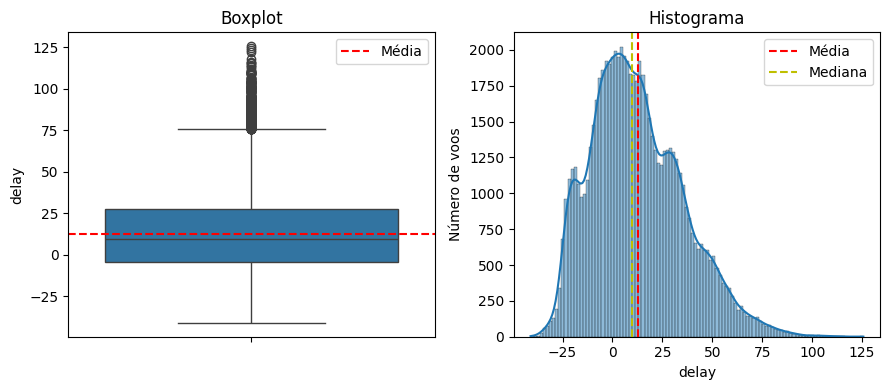

In [ ]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

#largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True)#, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# feature Engeniring

In [ ]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [ ]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str), format='%Y-%j')

In [ ]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [ ]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [ ]:
dados['day_name'] = dados['date'].dt.day_name()

In [ ]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [ ]:
dados['is_holiday'].unique()

array([False,  True])

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})

In [ ]:
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})

In [ ]:
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})

In [ ]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [ ]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)

In [ ]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


#Limpando os dados

In [ ]:
df_encoded[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)

In [ ]:
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


###EXERCICIO

In [ ]:
# Aplique a codificação dummy no código da aula utilizando o OneHotEncoder do Scikit-Learn em vez do get_dummies da biblioteca pandas.

# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     colunas_categoricas),
#     remainder='passthrough')

# dados = one_hot_enc.fit_transform(dados)
# dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
# dados

# Seleção e validação do modelo

## Treinamento do DummyRegressor

In [ ]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train,y_train)

DummyRegressor()

In [ ]:
y_pred_dummy = model_dummy.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def calcular_metricas_regressao(y_test, y_pred):

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas ={
      'Raiz do erro quadratico medio': round(rmse, 4),
      'Erro absoluto medio':round(mae,4),
      'R2 score': round(r2, 4)
  }

  return metricas

In [ ]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do erro quadratico medio': 23.0923,
 'Erro absoluto medio': 18.559,
 'R2 score': -0.0}

# Treinamento do RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadratico medio': 13.8938,
 'Erro absoluto medio': 11.1459,
 'R2 score': 0.638}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


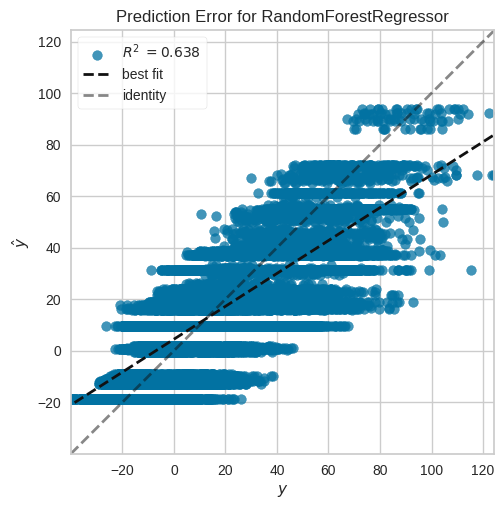

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


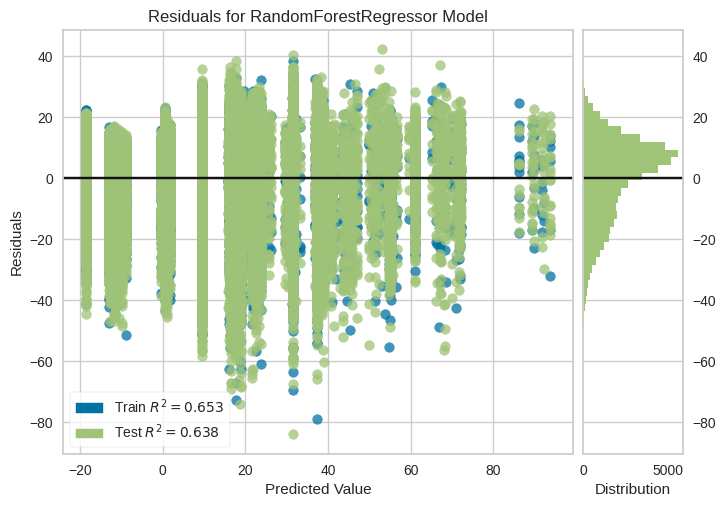

In [ ]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

# Validação cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
scoring = {
    'mae':'neg_mean_absolute_error',
    'rms2':'neg_root_mean_squared_error',
    'r2':'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

cv_results

{'fit_time': array([1.81165624, 1.89231157, 1.79955602, 1.30413151, 1.21880221]),
 'score_time': array([0.0539341 , 0.04598475, 0.03649354, 0.03424549, 0.03313184]),
 'test_mae': array([-11.24240619, -10.92675387, -10.98202258, -11.02080307,
        -10.87529715]),
 'test_rms2': array([-13.93324648, -13.59964626, -13.84672872, -13.71735307,
        -13.60008736]),
 'test_r2': array([0.63594605, 0.66666473, 0.6456553 , 0.65041644, 0.64983092])}

In [ ]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')

MAE Scores: [' -11.242', ' -10.927', ' -10.982', ' -11.021', ' -10.875']
MAE Média: -11.009, Std: 0.126
----------------------------------------------------------------------------------
RMS2 Scores: [' -13.933', ' -13.600', ' -13.847', ' -13.717', ' -13.600']
RMS2 Média: -13.739, Std: 0.133
----------------------------------------------------------------------------------
R2 Scores: [' 0.636', ' 0.667', ' 0.646', ' 0.650', ' 0.650']
R2 Média: 0.650, Std: 0.010
----------------------------------------------------------------------------------


# otimização de hiperparametros

## seleção de recursos

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


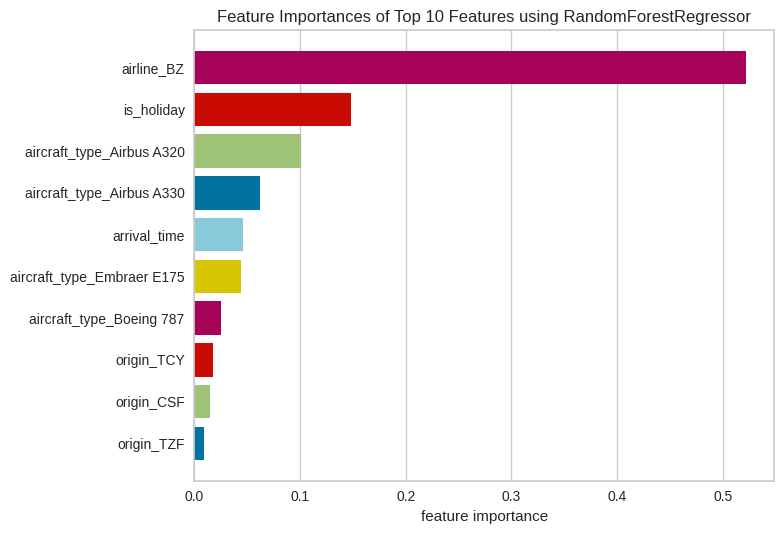

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
model_rf.feature_importances_

array([3.44061024e-05, 4.58589434e-02, 1.48125171e-01, 1.03321126e-04,
       5.22317983e-01, 2.49810658e-04, 1.50756966e-04, 1.00541571e-01,
       6.23233641e-02, 7.61750766e-05, 2.83046179e-05, 2.48865034e-02,
       4.44963477e-02, 3.66032990e-04, 9.23477077e-06, 1.44838069e-02,
       1.66755597e-04, 4.13633688e-04, 1.12680632e-03, 5.40160430e-03,
       1.75824324e-02, 8.97534276e-03, 6.36623215e-06, 1.02806556e-03,
       4.19076086e-04, 9.24687253e-05, 1.50565421e-04, 1.58652281e-04,
       1.17079931e-04, 3.09418116e-04])

In [ ]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.522318
2,is_holiday,0.148125
7,aircraft_type_Airbus A320,0.100542
8,aircraft_type_Airbus A330,0.062323
1,arrival_time,0.045859
12,aircraft_type_Embraer E175,0.044496
11,aircraft_type_Boeing 787,0.024887
20,origin_TCY,0.017582
15,origin_CSF,0.014484
21,origin_TZF,0.008975


In [ ]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):

  selected_features = feature_importances['Features'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)

  y_pred = model_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.4646,14.4646,14.5163,13.9111,13.9099,13.9097
MAE,11.6310,11.6310,11.4959,11.1631,11.1623,11.1622
R2,0.6076,0.6076,0.6048,0.6371,0.6372,0.6372


In [ ]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

# otimizando os hiperparamentros com o GridSerachCV

In [ ]:
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 4, 6],
'n_estimators': [100, 150, 200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
                          scoring='r2', cv=cv)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
y_pred_model_grid = model_grid.predict(X_test)


metricas_model_grid = calcular_metricas_regressao(y_test,y_pred_model_grid)
metricas_model_grid

{'Raiz do erro quadratico medio': 13.2635,
 'Erro absoluto medio': 10.6731,
 'R2 score': 0.6738}

In [ ]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.4646,14.4646,14.5163,13.9111,13.9099,13.9097,13.2635
MAE,11.6310,11.6310,11.4959,11.1631,11.1623,11.1622,10.6731
R2,0.6076,0.6076,0.6048,0.6371,0.6372,0.6372,0.6738


# Salvando o modelo

In [ ]:
import pickle

In [ ]:
try:
    with open('model_producao.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


## exercicio


In [ ]:
file_path = '/content/model_producao.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("Modelo carregado com sucesso!")
except Exception as e:
    print("Ocorreu um erro ao carregar o modelo:", str(e))

Modelo carregado com sucesso!


In [ ]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# Exemplo de previsão com dados de entrada 'X'
model.predict([nova_amostra])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


36.740529995725694